<a href="https://www.kaggle.com/code/perotti/housing-simple-pipeline?scriptVersionId=91502258" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Data exploration

## Stratified sampling?

In [2]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv",index_col='Id')
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv",index_col='Id')

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [6]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


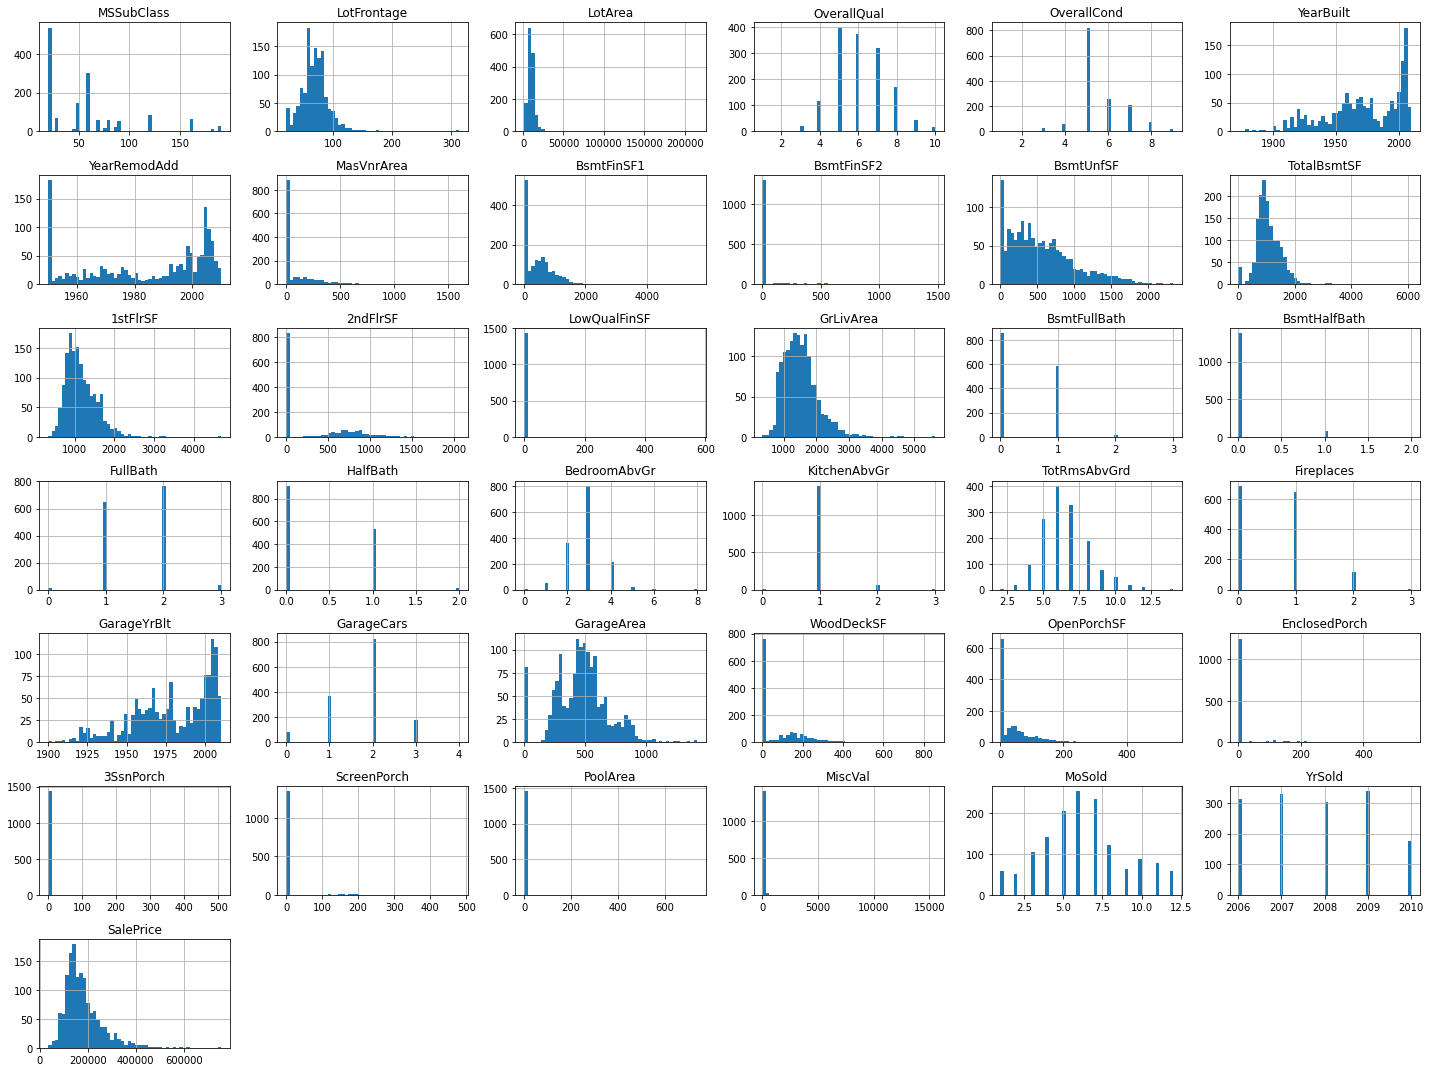

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure housing_prices_scatterplot


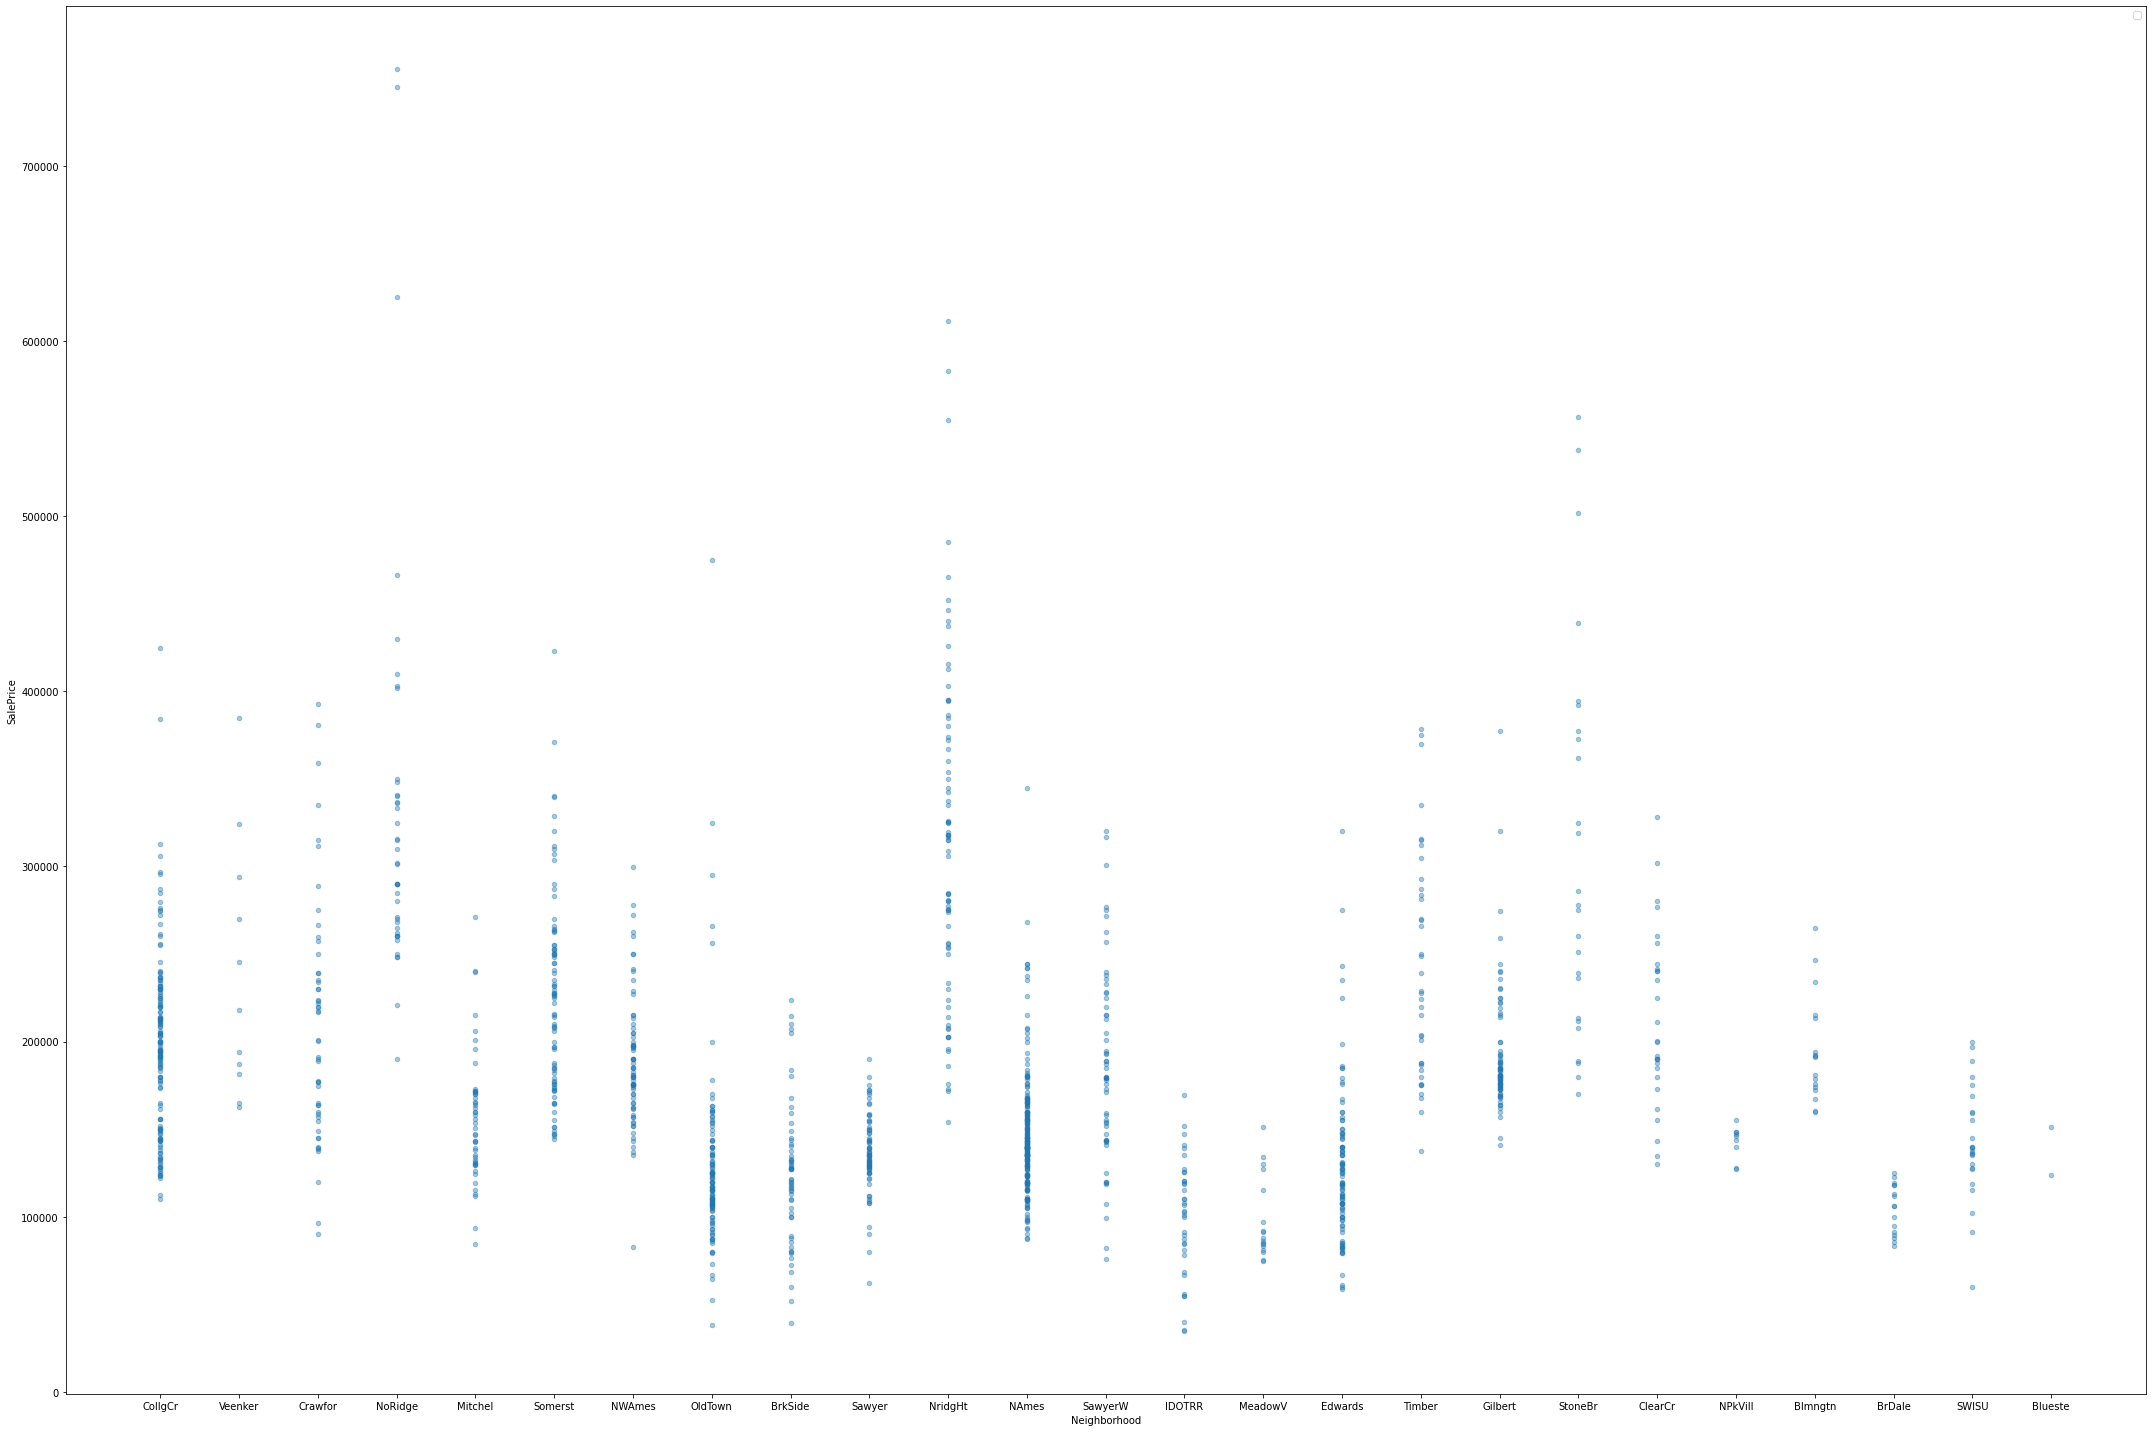

In [10]:
train.plot(kind="scatter", figsize=(30,20), x="Neighborhood", y="SalePrice", alpha=0.4)
plt.legend()
save_fig("housing_prices_scatterplot")

In [11]:
corr_matrix = train.corr()

In [12]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Saving figure scatter_matrix_plot


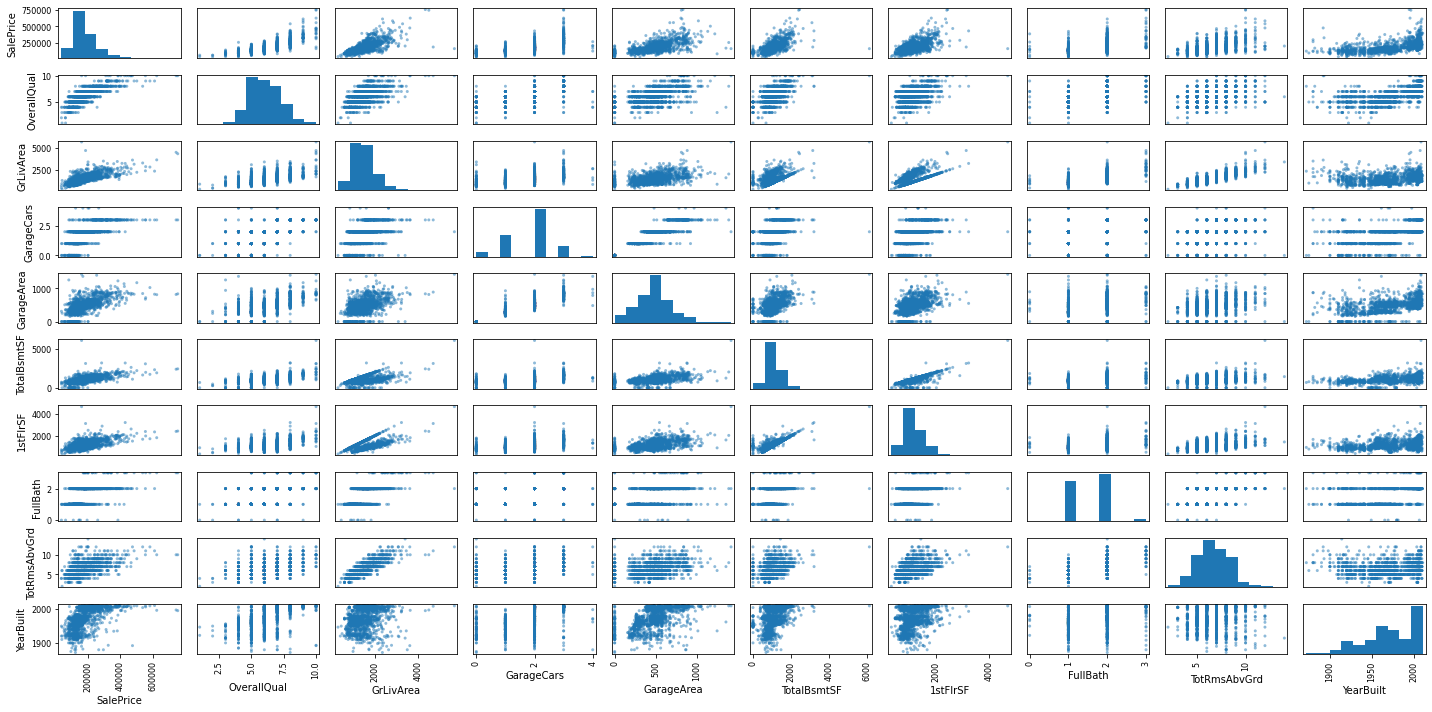

In [13]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea",
              "GarageCars", "GarageArea", "TotalBsmtSF",
              "1stFlrSF", "FullBath","TotRmsAbvGrd", "YearBuilt"]
scatter_matrix(train[attributes], figsize=(20, 10))
save_fig("scatter_matrix_plot")

# Dataset split

In [14]:
housing = train.copy()

In [15]:
housing_tr = housing.copy()


In [16]:
housing_tr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
housing_labels = housing_tr["SalePrice"].copy()
housing_tr = housing_tr.drop("SalePrice", axis=1) # drop labels for training set


In [18]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## NA check

In [19]:
sample_incomplete_rows = housing_tr[housing_tr.isnull().any(axis=1)]
sample_incomplete_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
housing_num = housing_tr.select_dtypes(include=[np.number])

In [21]:
housing_cat = housing_tr.select_dtypes(include=['object'])

In [22]:
housing_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [23]:
housing_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [24]:
housing_cat['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [25]:
housing_cat.columns.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [26]:
list(housing_cat)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# Transformation Pipelines

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [28]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00,
       1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02, 0.0000e+00,
       4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00, 0.0000e+00,
       1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9800e+03,
       2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       2.0080e+03])

In [30]:
housing_num.median().values

array([5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00,
       1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02, 0.0000e+00,
       4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00, 0.0000e+00,
       1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9800e+03,
       2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       2.0080e+03])

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:
housing_num_tr

array([[ 0.07337496, -0.22087509, -0.20714171, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-0.87256276,  0.46031974, -0.09188637, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [ 0.07337496, -0.08463612,  0.07347998, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  4.95311151,
        -0.48911005,  1.64520971],
       [-0.87256276, -0.08463612, -0.08016039, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [-0.87256276,  0.23325479, -0.05811155, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

In [33]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant")),
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
#         ('std_scaler', StandardScaler()),
    ])
housing_cat_tr = cat_pipeline.fit_transform(housing_cat)

In [34]:
cat_pipeline['encoder'].get_feature_names()

array(['x0_C (all)', 'x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Grvl',
       'x1_Pave', 'x2_Grvl', 'x2_Pave', 'x2_missing_value', 'x3_IR1',
       'x3_IR2', 'x3_IR3', 'x3_Reg', 'x4_Bnk', 'x4_HLS', 'x4_Low',
       'x4_Lvl', 'x5_AllPub', 'x5_NoSeWa', 'x6_Corner', 'x6_CulDSac',
       'x6_FR2', 'x6_FR3', 'x6_Inside', 'x7_Gtl', 'x7_Mod', 'x7_Sev',
       'x8_Blmngtn', 'x8_Blueste', 'x8_BrDale', 'x8_BrkSide',
       'x8_ClearCr', 'x8_CollgCr', 'x8_Crawfor', 'x8_Edwards',
       'x8_Gilbert', 'x8_IDOTRR', 'x8_MeadowV', 'x8_Mitchel', 'x8_NAmes',
       'x8_NPkVill', 'x8_NWAmes', 'x8_NoRidge', 'x8_NridgHt',
       'x8_OldTown', 'x8_SWISU', 'x8_Sawyer', 'x8_SawyerW', 'x8_Somerst',
       'x8_StoneBr', 'x8_Timber', 'x8_Veenker', 'x9_Artery', 'x9_Feedr',
       'x9_Norm', 'x9_PosA', 'x9_PosN', 'x9_RRAe', 'x9_RRAn', 'x9_RRNe',
       'x9_RRNn', 'x10_Artery', 'x10_Feedr', 'x10_Norm', 'x10_PosA',
       'x10_PosN', 'x10_RRAe', 'x10_RRAn', 'x10_RRNn', 'x11_1Fam',
       'x11_2fmCon', 'x11_Duplex', 'x1

In [35]:
len(cat_pipeline['encoder'].get_feature_names())

268

In [36]:

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

full_pipeline = ColumnTransformer(transformers=[
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
#         ("cat2", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_tr)

In [37]:
pd.DataFrame(housing_prepared).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [38]:
names= []
names.extend(num_attribs)
names.extend(cat_pipeline['encoder'].get_feature_names())

In [39]:
len(names)

304

# Select and Train a Model

In [40]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective = "reg:squarederror", max_depth=8, n_estimators=200, seed=0, booster = "dart", rate_drop = 0.1,
         skip_drop = 0.5).fit(housing_prepared, housing_labels)

In [41]:
from sklearn.metrics import mean_squared_error
housing_predictions = xgb.predict(housing_prepared)
xgb_mse = mean_squared_error(housing_labels, housing_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse


621.1964042754854

<AxesSubplot:>

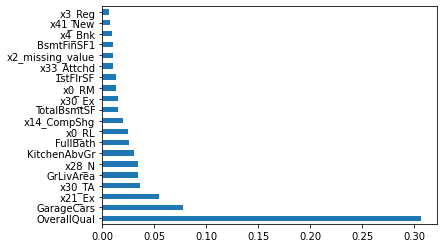

In [42]:
%matplotlib inline
feat_importances = pd.Series(xgb.feature_importances_,index=names)
feat_importances.nlargest(20).plot(kind='barh')

In [43]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective = "reg:squarederror", max_depth=8, n_estimators=200, seed=0, booster = "dart", rate_drop = 0.1,
         skip_drop = 0.5).fit(housing_prepared, housing_labels)

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42,
        ).fit(housing_prepared, housing_labels)

In [45]:
housing_predictions = reg.predict(housing_prepared)
gradient_mse = mean_squared_error(housing_labels, housing_predictions)
gradient_rmse = np.sqrt(gradient_mse)
gradient_rmse

20555.923166460943

<AxesSubplot:>

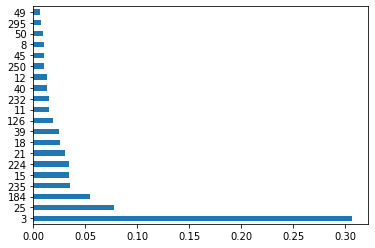

In [46]:
%matplotlib inline
feat_importances = pd.Series(xgb.feature_importances_, xgb.get_booster().feature_names)
feat_importances.nlargest(20).plot(kind='barh')

Linear regression baseline

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [48]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing_tr.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [208592.42752349 205670.17276669 205607.07771754 164854.49615858
 292191.06673109]


In [49]:
print("Labels:", list(some_labels))

Labels: [208500, 181500, 223500, 140000, 250000]


In [50]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20515.029051800324

In [51]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

13226.594514430533

In [52]:
lin_reg.n_features_in_

304

<AxesSubplot:>

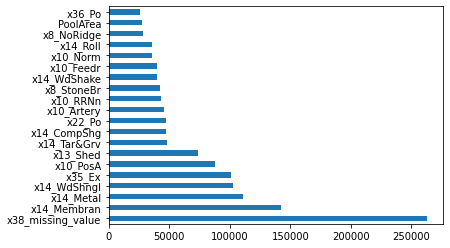

In [53]:
%matplotlib inline
feat_importances = pd.Series(lin_reg.coef_,index=names)
feat_importances.nlargest(20).plot(kind='barh')

<AxesSubplot:>

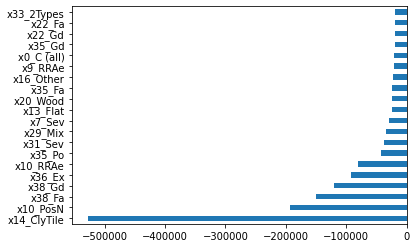

In [54]:
feat_importances = pd.Series(lin_reg.coef_,index=names)
feat_importances.nsmallest(20).plot(kind='barh')

But what are these????

In [55]:
import sklearn 
import warnings
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [56]:
X= get_feature_names(full_pipeline)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Transformer std_scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available


<AxesSubplot:>

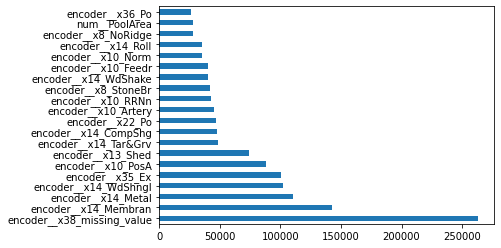

In [57]:
feat_importances = pd.Series(lin_reg.coef_,index=X)
feat_importances.nlargest(20).plot(kind='barh')

<AxesSubplot:>

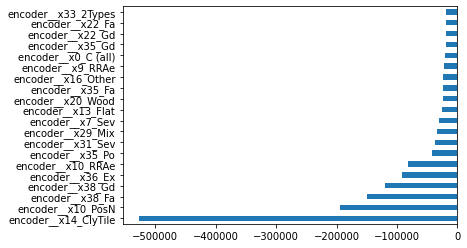

In [58]:
feat_importances.nsmallest(20).plot(kind='barh')

In [59]:
!pip install lime
import lime

In [60]:
import lime
import lime.lime_tabular
import warnings

In [61]:
explainer = lime.lime_tabular.LimeTabularExplainer(housing_prepared,  
mode='regression',training_labels=housing_labels,feature_names=names)

In [62]:
# asking for explanation for LIME model
i = 2
exp2 = explainer.explain_instance(housing_prepared[i], xgb.predict, num_features=10)
exp2.show_in_notebook(show_table=True)

In [63]:
# asking for explanation for LIME model
i = 3
exp2 = explainer.explain_instance(housing_prepared[i], xgb.predict, num_features=10)
exp2.show_in_notebook(show_table=True)

# Fine-Tune Your Model

# Cross-Validation

In [64]:
from sklearn.model_selection import cross_val_score
xgb_scores = cross_val_score(xgb, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10,n_jobs=-1)
xgb_rmse_scores = np.sqrt(-xgb_scores)


In [65]:
xgb_rmse_scores

array([23666.76665092, 25344.17929451, 23027.21547215, 38288.09661427,
       33281.81302188, 28894.20921118, 31357.02955773, 21606.64943289,
       39978.75483682, 26145.90268846])

In [66]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [67]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean      42119.070377
std       27058.665226
min       22731.775483
25%       23988.783485
50%       32480.037414
75%       43699.507855
max      108052.380046
dtype: float64